In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

In [4]:
def visualize_optical_flow(video_path):
    cap = cv.VideoCapture(video_path)
    frame_stack = []
    
    ret, first_frame = cap.read()
    if not ret:
        print("Failed to read the video")
        cap.release()
        return

    prev_gray = cv.cvtColor(first_frame, cv.COLOR_BGR2GRAY)

    frame_count = 0
    skip_count = 0
    flow_stack = []

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)

        if frame_count % 6 == 0:
            frame_stack.append(gray)

        if len(frame_stack) == 12 :
            stacked_frames = np.stack(frame_stack, axis=-1)
            flow = cv.calcOpticalFlowFarneback(prev_gray, gray, None, 0.5, 3, 15, 3, 5, 1.2, 0)
            flow_stack.append(flow)

            # Remove the oldest frame from the stack
            frame_stack.pop(0)

        prev_gray = gray
        frame_count += 1

    cap.release()

    # Calculate the mean optical flow magnitude across all frames
    mean_flow = np.mean(flow_stack, axis=0)
    magnitude, _ = cv.cartToPolar(mean_flow[..., 0], mean_flow[..., 1])

    # Color the optical flow magnitude
    magnitude = cv.normalize(magnitude, None, 0, 255, cv.NORM_MINMAX)
    magnitude = cv.applyColorMap(magnitude.astype(np.uint8), cv.COLORMAP_JET)

    # Resize the optical flow magnitude to match the frame size
    magnitude = cv.resize(magnitude, (first_frame.shape[1], first_frame.shape[0]))

    # Create a transparent background
    transparent_bg = np.zeros_like(first_frame)

    # Combine the real image and the optical flow with transparency
    result = cv.addWeighted(first_frame, 0.5, magnitude, 0.5, 0)

    # Display the real image and the optical flow side by side for comparison
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))
    axs[0].imshow(cv.cvtColor(first_frame, cv.COLOR_BGR2RGB))
    axs[0].axis('off')
    axs[0].set_title('Real Image')
    axs[1].imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB))
    axs[1].axis('off')
    axs[1].set_title('Optical Flow Visualization')
    plt.show()

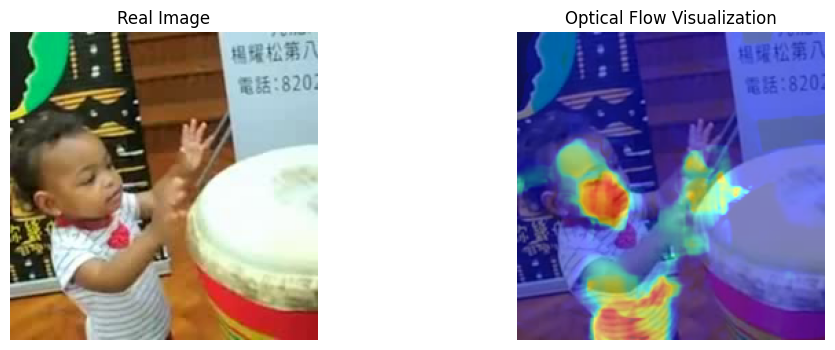

In [5]:
# Call the function with your video path
video_path = r"C:\Users\andre\OneDrive\Documents\GitHub\Brainvision_Project\Motion_files\videos_processed\0029_processed.mp4"
visualize_optical_flow(video_path)